# <font size=8>分类算法一：KNN算法<font>

## <font size=6><mark style=background-color:pink>一、KNN算法概述<mark><font>
<font size=4>
    
**算法思想**：
- ⼀个数据集中存在多个已有标签的样本值，这些样本值共有的$N$个特征构成了⼀个$N$维空间
- 当有⼀个需要预测/分类的样本$x$出现，我们把这个$x$放到多维空间$N$中，找到离其**距离**最近的$K$个样本，并将这些样本称为**近邻**（nearest neighbor)
- 如果⼀个样本在特征空间中的$k$个最近邻的样本中的⼤多数属于某⼀个类别，则该样本也属于这个类别，并具有这个类别上样本的特性
- 对这$K$个近邻，查看他们的标签都属于何种类型，根据 ”少数服从多数” 的投票原则进⾏判断，数量最多的标签类别就是$x$的标签类型
- 涉及到的原理是 “越相近越相似”
- KNN在类别决策时，只与极少量的相邻样本有关
- 由于KNN主要靠周围有限的邻近的样本，⽽不是靠判别**类域**的⽅法来确定所属类别的
- 因此对于<font color=red>类域的交叉或重叠较多的待分样本集来说，KNN较其他⽅法更为适合<font>
    
**算法功能**
- 核⼼功能是解决有监督(已知标签)的分类问题
- 可以被⽤于回归问题中，但回归的效果不好
    
**算法类型**
- 非参数模型：这里的参数不是指的超参数，而是模型里的参数
- ⾮参数的学习⽅法基于实例(instance-based)和记忆(memory-based)，它们所要做的是把训练实例放在⼀个查找表中，并由它们进⾏查值
- 像KNN所要做的是把训练实例放在⼀个查找表中，并由它们进⾏计算距离、查找近邻、进行投票
- ⾮参数模型的⼀个很重要的特点就是：**let the data speak for itself**. 正因为如此，<font color=red>⾮参数模型的存储开销和计算开销都⾮常⼤<font>
- <font color=red>⾮概率模型<font>：非概率模型指的是直接学习输入空间到输出空间的映射 ，学习的过程中基本不涉及概率密度的估计，概率密度的积分等操作，问题的关键在于最优化问题的求解

**算法要素**
- 训练集
- K值：近邻值，K值通常是采用交叉检验来确定（以K=1为基准），经验规则：K一般低于训练样本数的平方根
- 距离：远近的度量，Minkowski距离(p=1曼哈顿距离、p=2欧氏距离...)，$d(A,B)=\sqrt[p]{\sum^n_{i=1}(|x_{iA}-y_{iB}|)^p} $

**特征工程**
- 机器学习中有部分模型是基于距离度量进行模型预测和分类的，由于距离对特征之间不同取值范围非常敏感，所以基于距离度量的模型是十分有必要做**数据标准化**处理的
- 最典型基于距离度量的模型包括**K近邻、kmeans聚类、感知机和SVM**
- 线性回归类的几个模型一般情况下也是需要做数据标准化处理的
- 逻辑回归、决策树、基于决策树的Boosting和Bagging等集成学习模型对于特征取值大小并不敏感，一般不需要做数据标准化处理
- 另外有较多类别变量的数据也是不需要做标准化处理的。
    
**优点**：
- 简单，易于理解，易于实现
- **无需估计参数：估计参数与超参数不同，指的是模型里面的参数，而非超参数**
- 无需训练，即不需要迭代

**缺点**：
- 懒惰算法，对测试样本分类时的计算量大，内存开销大（性能问题）：计算复杂度高，空间复杂度高
- 必须指定K值，K值选择不当则分类精度不能保证，k值取很大时正确目标值的比例受到影响，k值取很小时容易受异常点影响
- 样本不平衡容易导致结果错误：如一个类的样本容量很大，而其他类样本容量很小时，有可能导致当输入一个新样本时，该样本的K个邻居中大容量类的样本占多数。对此可以采用权值的方法（和该样本距离小的邻居权值大）来改进。

**适用数据范围**：
- 数值型和标称型
- 小数据场景，即几千到几万的样本
<font>

## <font size=6><mark style=background-color:pink>二、KNN算法的原理<mark><font>

<font size=4>
    
**工作原理**：
- 存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都**存在标签**，即知道样本集中每一数据与所属分类的对应关系
- 输入没有标签的数据后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似数据(**最近邻**)的分类标签
- 一般来说，只选择样本数据集中前K个最相似的数据，这就是KNN算法中k的出处，通常k是不大于20的整数
- 最后，选择K个最相似数据中出现次数最多的分类，作为新数据的分类，也就是作为输入的没有标签的数据的标签
    
**KNN算法涉及的实例**：
- 根据打斗镜头数和亲吻镜头数对未知电影进行分类(爱情片或者动作片)
- 改进约会网站
- 手写数字识别系统
    
**KNN算法的一般流程**：
- ①收集数据：可以使用任何方法
- ②准备数据：距离计算最需要的数值，最好是结构化的数据格式，可能需要归一化、标准化处理
- ③分析数据：可以使用任何方法
- ④训练算法：此步骤不适用于KNN算法，KNN算法不需要迭代
- ⑤测试算法：计算错误率
- ⑥使用算法：首先需要输入样本数据和结构化的输出结果，然后运行KNN算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。
<font>

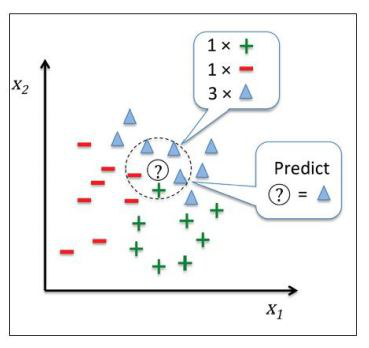
- 算距离  
给定测试对象$Item$ ，计算它与训练集中每个对象的距离。  
依据公式计算$Item$与$D_1,D_2,...,D_j$ 之间的相似度，得到$Sim(Item,D_1),Sim(Item,D_2),...,Sim(Item,D_j)$
- 找邻居  
圈定距离最近的$k$个训练对象，作为测试对象的近邻。
将$Sim(Item,D_1),Sim(Item,D_2),...,Sim(Item,D_j)$排序，找到相似度最高的K个(距离最近的K个)，又或者是超过相似度阈值$t$，则放⼊邻居集合NN.
- 做分类  
根据这$k$个近邻归属的主要类别，来对测试对象进⾏分类。
⾃邻居集合NN中取出前$k$名，查看它们的标签，对这$k$个点的标签，以多数决，得到$Item$可能类别。

## <font size=6><mark style=background-color:pink>三、KNN算法的Python纯代码实现<mark><font>
<font size=4>    
    
**实际操作流程**：
- ①计算已知类别数据集中的点与当前点之间的距离(欧式距离)，根据情况对每个特征对应的数据进行归一化、标准化处理
- ②按照距离递减次序排序
- ③选取与当前点距离最小的K个点
- ④确定前K个点所在类别(对应的标签或者目标值)出现的频率
- ⑤返回前K个点出现频率最高的类别作为当前点的预测分类

**按照实际操作流程构造分类器**：
- 相当于在python中构造一个函数，这个函数也就是分类器
- 函数名为classify0()
- classify0(inX ,dataSet ,labels ,k )
- inX：用于分类的输入向量
- dataSet：训练样本集
- labels：标签向量
- k：用于选择最近邻居的数目
    
**详见**：
- https://blog.csdn.net/qq_45603919/article/details/120478822
<font>

## <font size=6><mark style=background-color:pink>四、sklearn中的KNN算法<mark><font>

### <font size=4>KNN算法<font>
<font size=4>
    
- 类：**sklearn.neighbors.KNeighborsClassifier**
- 实例化语法：**sklearn.neighbors.KNeighborsClassifier(n_neighbors=5,algorithm='auto')**
- **n_neighbors**：int，可选，默认为5，k_neighbors查询默认使用的邻居数，是一个**超参数**
- **algorithm**：{'auto','ball_tree','kd_tree','brute'}，可选用于计算最近邻居的算法，'auto'将尝试根据传递给fit方法的值来决定最合适的算法，不同的实现方式影响效率
<font>
- **weights**：参数指定了各个最近邻的权重分布方式，其默认值为‘uniform’，也就表示所有nearest neighbor的权重都一样，另外也可以选择‘distance’，此时就表示权重和距离相关
- **metric**：表示距离的度量方式，默认值为'minkowski'
- **p**：'minkowski'距离中的p值
   

### 计算最近邻居的算法
<font size=4>
    
- **auto**：将尝试根据传递给fit方法的值来决定最合适的算法，不同的实现方式影响效率
- **brute**：暴力搜索，当未知类别的样本进入将和训练集中的每个样本计算距离
- **ball_tree**
- **kd_tree**
    
**'kd_tree'(K维树)**
- 建树  
1. 选取<font color=red>方差最大的第K个特征作为分割特征<font>
2. 选择<font color=red>第K个特征中所有样本特征值的中位数m作为分割点<font>，如果是偶数个特征值，则选择大于中位数的那个最小特征值，建立父节点
3. 将数据集中第K个特征对应的特征值小于中位数的分到父节点的左子节点,大于中位数的分到父节点的右子节点
4. 递归执行步骤1-3，直到所有数据都被分到KD Tree的节点上为止  
**KDTree的建立步骤跟BST是非常相似的,可以认为BST是KDTree在一维数据上的特例**
    
- 查找：
1. 将未知标签的样本Q从根节点开始，按照Q与各个节点的比较结果向下访问Kd-Tree，直至达到叶子节点
2. 其中Q与节点的比较指的是将Q对应于节点中的**k维度上的值与第K个特征的中值m进行比较**，若Q的第K个特征的特征＜m，则访问左子树，否则访问右子树
3. 达到叶子节点时，计算Q与叶子节点上保存的数据之间的距离，记录下最小距离对应的数据点，记为当前最近邻点nearest和最小距离dis
4. 进行回溯操作，该操作是为了找到离Q更近的“最近邻点”，即判断未被访问过的分支里是否还有离Q更近的点，它们之间的距离小于dis
5. 如果Q与其父节点下的未被访问过的分支之间的距离小于dis，则认为该分支中存在离Q更近的数据，进入该节点，进行上一步一样的查找过程，如果找到更近的数据点，则更新为当前的最近邻点nearest，并更新dis，如果Q与其父节点下的未被访问过的分支之间的距离大于dis，则说明该分支内不存在与Q更近的点
    
**回溯的判断过程是从下往上进行的，直到回溯到根节点时已经不存在与Q更近的分支为止**
    
注：
- 判断未被访问过的树分支中是否还有离Q更近的点，就是判断"Q与未被访问的树分支的距离  |Q(k) - m|"是否小于"Q到当前的最近邻点nearest的距离dis"
- 从几何空间上来看，就是判断以Q为中心，以dis为半径超球面是否与未被访问的树分支代表的超矩形相交

    

## <font size=6><mark style=background-color:pink>五、KNN算法案例：鸢尾花数据集的分类<mark><font>

### ①首先导入所需要的类：鸢尾花数据集、数据集划分、KNN算法估计器、数据标准化

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### ②准备鸢尾花数据集，对数据集进行划分

In [4]:
#准备鸢尾花数据集
iris = load_iris()

#鸢尾花数据集的数值(特征值)：iris.data or iris['data']
#鸢尾花数据集的标签(目标值)：iris.target or iris['target']

#训练集的数值(特征值)：X_train
#训练集的标签(目标值)：Y_train
#测试集的数值(特征值)：X_test
#测试集的标签(目标值)：Y_test

#划分训练集和测试集
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=2021)   #test_size：测试集的占比

In [42]:
#了解鸢尾花数据集

#鸢尾花数据集的数据描述
#iris.DESCR

#鸢尾花数据集的特征名称，共有四个特征
#iris.feature_names
#['sepal length (cm)',
# 'sepal width (cm)',
# 'petal length (cm)',
# 'petal width (cm)']

#鸢尾花数据集的特征数据数组，是(n_samples,m_features)的二维numpy.ndarray数组
#iris.data

#鸢尾花数据集的标签名称，共有三个类别
#iris.target_names
#array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### ③特征工程：对每个特征对应的特征值进行标准化处理

In [9]:
#实例化数据标准化的转换器
std = StandardScaler()

#将训练集的数据进行标准化处理
X_train = std.fit_transform(X_train)

#将测试集的数据进行标准化处理
X_test = std.transform(X_test)

### ④根据指定的K值实例化KNN算法

In [10]:
#这里指定K值为5
knn = KNeighborsClassifier(n_neighbors=5)

### ⑤将训练集的数值和标签带入得到KNN算法模型

In [11]:
knn = knn.fit(X_train,Y_train)

### ⑥将没有标签的测试集数值X_test代入，根据所得模型预测测试集的标签Y_test_pred

In [12]:
Y_test_pred = knn.predict(X_test)

### ⑦将测试集实际的标签Y_test和模型预测得到的测试集标签Y_test_pred对比，评估模型

In [13]:
knn.score(X_test,Y_test)

0.9666666666666667

### ⑧所得模型在测试集上表现不错，准确率约为97%，可供后续使用，现传入任意非训练集和非测试集的鸢尾花数据，都可以用模型预测分类

In [28]:
new_data = [[6.1,3.1,4.7,2.1]] #注意这里需要是一个二维的array
new_data = std.transform(new_data)
new_data

array([[0.21388544, 0.08384394, 0.46121294, 1.0946744 ]])

In [29]:
test1 = knn.predict(new_data)  
print(test1)

[2]


### ⑨可以根据对应标签值查看类别

In [30]:
iris.target_names[2]

'virginica'

## <font size=6><mark style=background-color:pink>六、KNN算法的优化：交叉验证+网格搜索<mark><font>

#### <font size=4>1.交叉验证：为了让被评估的模型更加准确可信<font>

<font size=4>
    
- ①将数据分为训练集和测试集
- ②将训练集所有数据分成N等份，让其中1份的数据作为**验证集**，剩下的N-1份作为**训练集**，也就是训练集又分为了训练集和验证集
- ③加入将第一份作为**验证集**，剩下的作为训练集，则可以得到一个模型1和准确率1
- ④换下一份作为**验证集**，剩下的作为训练集，则可以得到一个模型2和准确率2
- ...
- ⑤直到每一份都作为过**验证集**，得出了N个模型和N个准确率
- ⑥将N个准确率求平均值，得到一个**平均模型结果**
- 这样的交叉验证称为**N折交叉验证**
<font>

#### <font size=4>2.网格搜索：也称为超参数搜索，调参数用，常和交叉验证搭配使用<font>
<font size=4>
    
- **超参数**：通常情况下，有很多参数是需要手动指定的(如KNN算法中的K值),这种参数叫做超参数。

- **调参**：但是手动过程繁杂，所以需要对模型预设几种超参数组合，每组超参数都采用交叉验证来进行评估，最后选出最优参数组合建立模型。

- 比如，KNN：只有一个超参数，K值
|K值|K=3|K=5|K=7|
|---|---|---|---|
|模型|模型1|模型2|模型3|
|N折交叉验证|平均准确率1|平均准确率2|平均准确率3|

- 不止一个超参数时，比如有两个超参数：a=[2,3,5,8,10]，b=[20,70,80]，那么就需要两两组合[{2,20}，{2,70}，{2,80}...]后进行N折交叉验证
<font>

#### <font size=4>3.sklearn中交叉验证+网格搜索<font>
<font size=4>
    
- **类**：**sklearn.model_selection.GridSearchCV**：'CV'-cross validation 
- **实例化语法**：**sklearn.model_selection.GridSearchCV(estimator,param_grid=,cv=)**
- estimator：估计器对象
- param_grid：估计器参数(dict)(例如KNN中：'n_neighbors':[1，3，5])
- cv：指定几折交叉验证
- **fit**：输入训练数据
- **score**：准确率
- **结果分析**
- best_score_：在交叉验证中验证的最好结果
- best_estimator_：最好的参数模型
- cv_results_：每次交叉验证后的验证集准确率结果和训练集准确率结果
<font>

#### <font size=4>4.对KNN算法进行交叉验证和网格搜索<font>

In [43]:
#导入鸢尾花数据集的类
from sklearn.datasets import load_iris

#实例化鸢尾花数据集
iris = load_iris()

In [44]:
#导入数据集划分的类
from sklearn.model_selection import train_test_split

#对鸢尾花数据集进行划分
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.25,random_state=2021)

In [46]:
#进行特征工程，对数据进行标准化处理
#导入标准化处理的类
from sklearn.preprocessing import StandardScaler

#实例化标准化处理的转换器
std = StandardScaler()

#对训练集的特征数据集进行标准化处理
X_train = std.fit_transform(X_train)

#对测试集的特征数据集进行标准化处理
X_test = std.transform(X_test)

In [47]:
#导入KNN算法的类
from sklearn.neighbors import KNeighborsClassifier

#实例化KNN算法，不要设置超参数K值
knn = KNeighborsClassifier()

In [48]:
#导入交叉验证和网格搜索的类
from sklearn.model_selection import GridSearchCV

#构造一些参数的值进行搜索，看K值为3、5、10时的表现结果，选择表现结果最好的作为最后的K值
#此处应构造为字典的形式
param = {'n_neighbors':[3,5,10]}

#实例化交叉验证和网格搜索的类
gc = GridSearchCV(knn,param_grid=param,cv=2)

In [49]:
#输入训练集的数据
gc.fit(X_train,Y_train)

#看在交叉验证中最好的结果
print('训练集在交叉验证中最好的结果：',gc.best_score_)

#查看在交叉验证和网格搜索后的最好的模型
print('训练集在交叉验证中最好的模型：',gc.best_estimator_)

#每个超参数每次交叉验证的结果
print('每个超参数每次交叉验证的结果：',gc.cv_results_)

#预测准确率
print('在测试集上的准确率:',gc.score(X_test,Y_test))

训练集在交叉验证中最好的结果： 0.9464285714285714
训练集在交叉验证中最好的模型： KNeighborsClassifier()
每个超参数每次交叉验证的结果： {'mean_fit_time': array([0.        , 0.        , 0.00049663]), 'std_fit_time': array([0.        , 0.        , 0.00049663]), 'mean_score_time': array([0.0020293 , 0.00099504, 0.00149477]), 'std_score_time': array([2.77757645e-05, 1.31130219e-06, 4.96029854e-04]), 'param_n_neighbors': masked_array(data=[3, 5, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 10}], 'split0_test_score': array([0.91071429, 0.92857143, 0.98214286]), 'split1_test_score': array([0.91071429, 0.96428571, 0.91071429]), 'mean_test_score': array([0.91071429, 0.94642857, 0.94642857]), 'std_test_score': array([0.        , 0.01785714, 0.03571429]), 'rank_test_score': array([3, 1, 1])}
在测试集上的准确率: 0.9736842105263158
